# Pandas Practice Exercises

This notebook contains 40+ exercises to practice your Pandas skills. The exercises start from the basics and gradually increase in difficulty.

## Datasets Used
We will use a few common datasets available online. You can load them directly using the URLs provided in the exercises.
1. **Chipotle**: `https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv`
2. **Drinks**: `https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv`
3. **Titanic**: `https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv`

---

## Section 1: Getting Started & Basic Data Structures


In [161]:
# 1. Import pandas as pd and numpy as np
import pandas as pd
import numpy as np

In [162]:
# 2. Print the version of pandas that has been imported.
print(pd.__version__)

2.2.2


In [163]:
# 3. Create a pandas Series from the following list:
data = [10, 20, 30, 40, 50]
# Your code here
data=pd.Series(data)
print(data)

0    10
1    20
2    30
3    40
4    50
dtype: int64


In [164]:
# 4. Create a DataFrame from the following dictionary:
data_dict = {
    'name': ['Alice', 'Bob', 'Charlie', 'David'],
    'age': [25, 30, 35, 40],
    'city': ['New York', 'Los Angeles', 'Chicago', 'Houston']
}
# Your code here
data_dict=pd.DataFrame(data_dict)
print(data_dict)

      name  age         city
0    Alice   25     New York
1      Bob   30  Los Angeles
2  Charlie   35      Chicago
3    David   40      Houston


In [165]:
# 5. Set the 'name' column as the index of the DataFrame created in Q4.
data_dict.set_index('name',inplace=True)
print(data_dict)

         age         city
name                     
Alice     25     New York
Bob       30  Los Angeles
Charlie   35      Chicago
David     40      Houston


---
## Section 2: Loading Data & Basic Exploration
For this section, we will use the **Chipotle** dataset.
URL: `https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv`
*Note: This file is tab-separated.*


In [166]:
# 6. Load the dataset into a variable called `chipo`.
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
# Your code here
chipo=pd.read_csv(url,sep='\t')

In [167]:
# 7. Show the first 10 entries of the dataframe.
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [168]:
# 8. What is the number of observations (rows) and columns in the dataset?
rows,cols=chipo.shape
print('no. of rows:',rows)
print('no. of cols:',cols)

no. of rows: 4622
no. of cols: 5


In [169]:
# 9. Print the name of all the columns.
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [170]:
# 10. How is the dataset indexed?
chipo.index
#default indexed

RangeIndex(start=0, stop=4622, step=1)

---
## Section 3: Data Cleaning & Manipulation
Continue using the `chipo` dataframe.


In [171]:
# 11. Check the data type of each column.
chipo.dtypes

,0
order_id,int64
quantity,int64
item_name,object
choice_description,object
item_price,object


In [172]:
# 12. The 'item_price' column is currently an object (string) because of the '$' sign.
# Clean this column: remove the '$' and convert it to a float.
chipo['item_price']=chipo['item_price'].str.replace('$','').astype(float)

In [173]:
# 13. Are there any missing values in the dataset? Check for nulls.
chipo.isnull().sum()

,0
order_id,0
quantity,0
item_name,0
choice_description,1246
item_price,0


In [174]:
# 14. Drop any duplicate rows, if they exist.
chipo.duplicated().sum()
chipo.drop_duplicates(inplace=True)

In [175]:
# 15. Create a new column 'revenue' which is the product of 'quantity' and 'item_price'.
chipo['revenue']=chipo['quantity']*chipo['item_price']

---
## Section 4: Filtering & Sorting


In [176]:
# 16. Sort the dataframe by 'item_price' in descending order.
chipo.sort_values(by='item_price',ascending=False)

,order_id,quantity,item_name,choice_description,item_price,revenue
3598,1443,15,Chips and Fresh Tomato Salsa,NaN,44.25,663.75
3480,1398,3,Carnitas Bowl,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",35.25,105.75
3602,1443,4,Chicken Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",35.00,140.00
1254,511,4,Chicken Burrito,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",35.00,140.00
3601,1443,3,Veggie Burrito,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",33.75,101.25
...,...,...,...,...,...,...
2584,1025,1,Canned Soda,[Mountain Dew],1.09,1.09
107,47,1,Canned Soda,[Dr. Pepper],1.09,1.09
87,38,1,Bottled Water,NaN,1.09,1.09
3499,1405,1,Bottled Water,NaN,1.09,1.09


In [177]:
# 17. How many items cost more than $10.00?
(chipo['item_price']>10).sum()

np.int64(1123)

In [178]:
# 18. What is the price of each item?
# (Hint: print a dataframe with only two columns: item_name and item_price, drop duplicates)
price_per_item=chipo[['item_name','item_price']].drop_duplicates()
price_per_item

,item_name,item_price
0,Chips and Fresh Tomato Salsa,2.39
1,Izze,3.39
2,Nantucket Nectar,3.39
3,Chips and Tomatillo-Green Chili Salsa,2.39
4,Chicken Bowl,16.98
...,...,...
4237,Chips and Guacamole,8.50
4354,Steak Soft Tacos,18.50
4489,Chips and Guacamole,17.80
4509,Chips,1.99


In [179]:
# 19. Select only the items where the name is 'Chicken Bowl'.
chipo[chipo['item_name']=='Chicken Bowl']

,order_id,quantity,item_name,choice_description,item_price,revenue
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,33.96
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98,10.98
13,7,1,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25,11.25
19,10,1,Chicken Bowl,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",8.75,8.75
26,13,1,Chicken Bowl,"[Roasted Chili Corn Salsa (Medium), [Pinto Bea...",8.49,8.49
...,...,...,...,...,...,...
4590,1825,1,Chicken Bowl,"[Roasted Chili Corn Salsa, [Rice, Black Beans,...",11.25,11.25
4591,1825,1,Chicken Bowl,"[Tomatillo Red Chili Salsa, [Rice, Black Beans...",8.75,8.75
4595,1826,1,Chicken Bowl,"[Tomatillo Green Chili Salsa, [Rice, Black Bea...",8.75,8.75
4599,1827,1,Chicken Bowl,"[Roasted Chili Corn Salsa, [Cheese, Lettuce]]",8.75,8.75


In [180]:
# 20. Select items where the name is 'Chicken Bowl' AND the quantity is greater than 1.
chipo[(chipo['item_name']=='Chicken Bowl')&(chipo['quantity']>1)]

,order_id,quantity,item_name,choice_description,item_price,revenue
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,33.96
154,70,2,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",17.50,35.00
282,124,2,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",17.50,35.00
409,178,3,Chicken Bowl,"[[Fresh Tomato Salsa (Mild), Tomatillo-Green C...",32.94,98.82
415,181,2,Chicken Bowl,[Tomatillo Red Chili Salsa],17.50,35.00
654,271,2,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",17.50,35.00
976,401,2,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",17.50,35.00
1017,418,2,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Cheese, Black Beans]]",17.50,35.00
1106,457,2,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",17.50,35.00
1429,578,2,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Sour Cream, Guacam...",22.50,45.00


---
## Section 5: Aggregation & Grouping
For this section, we will use the **Drinks** dataset.
URL: `https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv`


In [181]:
# 21. Load the drinks dataset into a variable called `drinks`.
url_drinks = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv'
# Your code here
drinks=pd.read_csv(url_drinks)

In [182]:
# 22. Which continent drinks more beer on average?
drinks.head()
drinks.groupby('continent')['beer_servings'].mean().sort_values(ascending=False)
#EU drinks more beer on average

,beer_servings
continent,
EU,193.777778
SA,175.083333
OC,89.687500
AF,61.471698
AS,37.045455


In [183]:
# 23. For each continent, print the statistics for wine consumption.
drinks.groupby('continent')['wine_servings'].describe()

,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
AF,53.0,16.264151,38.846419,0.0,1.0,2.0,13.00,233.0
AS,44.0,9.068182,21.667034,0.0,0.0,1.0,8.00,123.0
EU,45.0,142.222222,97.421738,0.0,59.0,128.0,195.00,370.0
OC,16.0,35.625000,64.555790,0.0,1.0,8.5,23.25,212.0
SA,12.0,62.416667,88.620189,1.0,3.0,12.0,98.50,221.0


In [184]:
# 24. Print the mean alcohol consumption per continent for every column.
drinks.head()
drinks.groupby('continent').mean(numeric_only=True)

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,61.471698,16.339623,16.264151,3.007547
AS,37.045455,60.840909,9.068182,2.170455
EU,193.777778,132.555556,142.222222,8.617778
OC,89.687500,58.437500,35.625000,3.381250
SA,175.083333,114.750000,62.416667,6.308333


In [185]:
# 25. Print the median alcohol consumption per continent for every column.
drinks.groupby('continent').median(numeric_only=True)

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,32.0,3.0,2.0,2.30
AS,17.5,16.0,1.0,1.20
EU,219.0,122.0,128.0,10.00
OC,52.5,37.0,8.5,1.75
SA,162.5,108.5,12.0,6.85


---
## Section 6: Apply & Advanced Selection
Back to the `chipo` dataset


In [186]:
# 26. Create a function that returns "High" if a price is > 10 and "Low" otherwise.
# Apply this function to the 'item_price' column of `chipo` and create a new column 'price_level'.
def apply_level(price):
  if(price>10):
    return 'High'
  else:
    return 'Low'
chipo['price_level']=chipo['item_price'].apply(apply_level)

In [187]:
# 27. Use the `apply` method to capitalize all strings in the 'item_name' column.
chipo['item_name'].apply(lambda x:x.upper())

,item_name
0,CHIPS AND FRESH TOMATO SALSA
1,IZZE
2,NANTUCKET NECTAR
3,CHIPS AND TOMATILLO-GREEN CHILI SALSA
4,CHICKEN BOWL
...,...
4617,STEAK BURRITO
4618,STEAK BURRITO
4619,CHICKEN SALAD BOWL
4620,CHICKEN SALAD BOWL


In [188]:
# 28. Select only the rows from index 10 to 20 (inclusive) and columns 1 to 3.
chipo.iloc[10:21,1:4]

,quantity,item_name,choice_description
10,1,Chips and Guacamole,NaN
11,1,Chicken Crispy Tacos,"[Roasted Chili Corn Salsa, [Fajita Vegetables,..."
12,1,Chicken Soft Tacos,"[Roasted Chili Corn Salsa, [Rice, Black Beans,..."
13,1,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,..."
14,1,Chips and Guacamole,NaN
15,1,Chips and Tomatillo-Green Chili Salsa,NaN
16,1,Chicken Burrito,"[Tomatillo-Green Chili Salsa (Medium), [Pinto ..."
17,1,Chicken Burrito,"[Fresh Tomato Salsa (Mild), [Black Beans, Rice..."
18,2,Canned Soda,[Sprite]
19,1,Chicken Bowl,"[Tomatillo Red Chili Salsa, [Fajita Vegetables..."


---
## Section 7: Merging & Joining


In [189]:
# 29. Create two dataframes:
df1 = pd.DataFrame({'ID': [1, 2, 3], 'Name': ['Alice', 'Bob', 'Charlie']})
df2 = pd.DataFrame({'ID': [2, 3, 4], 'Score': [85, 90, 95]})

# Merge them on 'ID' using an inner join.
merged=pd.merge(df1,df2,on='ID',how='inner')
merged

,ID,Name,Score
0,2,Bob,85
1,3,Charlie,90


In [190]:
# 30. Merge them on 'ID' using an outer join.
merged2=pd.merge(df1,df2,on='ID',how='outer')
merged2

,ID,Name,Score
0,1,Alice,NaN
1,2,Bob,85.0
2,3,Charlie,90.0
3,4,NaN,95.0


In [191]:
# 31. Merge them on 'ID' using a left join (keep all from df1).
merged3=pd.merge(df1,df2,on='ID',how='left')
merged3

,ID,Name,Score
0,1,Alice,NaN
1,2,Bob,85.0
2,3,Charlie,90.0


---
## Section 8: Time Series
For this section, let's generate some time series data.


In [192]:
# 32. Create a date range from '2023-01-01' to '2023-01-10'.
dates=pd.date_range(start='2023-01-01',end='2023-01-10')

In [193]:
# 33. Create a DataFrame with this date range as the index and a column 'Sales' with random values.
df=pd.DataFrame({'Sales':np.random.randint(1,99,size=len(dates))},index=dates)
df

,Sales
2023-01-01,18
2023-01-02,24
2023-01-03,14
2023-01-04,69
2023-01-05,31
2023-01-06,66
2023-01-07,42
2023-01-08,52
2023-01-09,48
2023-01-10,35


In [194]:
# 34. Resample the data to calculate the 3-day sum of sales.
df.resample('3D').sum()

,Sales
2023-01-01,56
2023-01-04,166
2023-01-07,142
2023-01-10,35


In [195]:
# 35. Shift the 'Sales' column by 1 day (create a lag column).
df['Sales_lag1']=df['Sales'].shift(1)
df

,Sales,Sales_lag1
2023-01-01,18,NaN
2023-01-02,24,18.0
2023-01-03,14,24.0
2023-01-04,69,14.0
2023-01-05,31,69.0
2023-01-06,66,31.0
2023-01-07,42,66.0
2023-01-08,52,42.0
2023-01-09,48,52.0
2023-01-10,35,48.0


---
## Section 9: Titanic Dataset - Mixed Practice
URL: `https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv`


In [196]:
# 36. Load the Titanic dataset.
url_titanic = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
# Your code here
titanic_df=pd.read_csv(url_titanic)

In [197]:
# 37. How many passengers survived? (Survived=1)
titanic_df
titanic_df['Survived'].sum()

np.int64(342)

In [198]:
# 38. What is the average age of passengers?
titanic_df
titanic_df['Age'].mean()

np.float64(29.69911764705882)

In [199]:
# 39. Group by 'Pclass' and calculate the survival rate (mean of 'Survived').
titanic_df.groupby('Pclass')['Survived'].mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [200]:
# 40. Fill missing values in the 'Age' column with the median age.
titanic_df['Age'].fillna(titanic_df['Age'].median(),inplace=True)

/tmp/ipython-input-2290288217.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Age'].fillna(titanic_df['Age'].median(),inplace=True)


In [201]:
# 41. Create a pivot table showing the average age by 'Sex' and 'Pclass'.
titanic_df.pivot_table(index='Sex',values='Age',columns='Pclass',aggfunc='mean')

Pclass,1,2,3
Sex,,,
female,33.978723,28.703947,23.572917
male,38.995246,30.512315,26.911873


---
## Section 10: Visualization (Optional)
Requires matplotlib/seaborn


Text(0, 0.5, 'Freq')

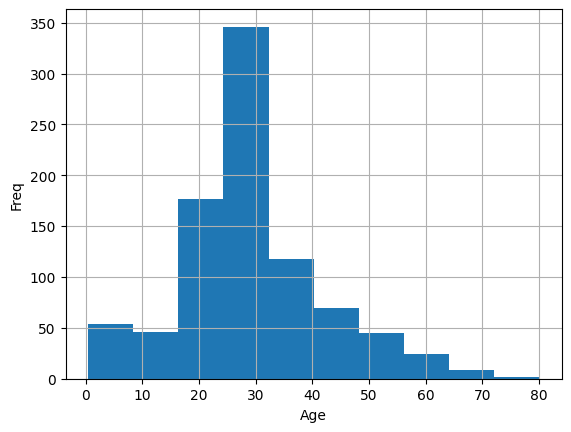

In [202]:
# 42. Plot a histogram of the 'Age' column from the Titanic dataset.
import matplotlib.pyplot as plt
titanic_df['Age'].hist()
plt.xlabel('Age')
plt.ylabel('Freq')

Text(0, 0.5, 'Average Fare')

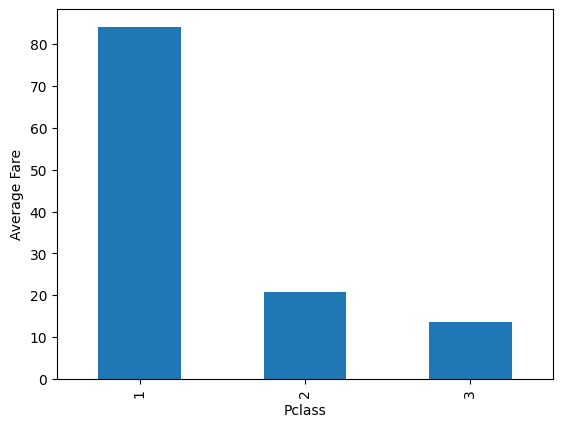

In [203]:
# 43. Plot a bar chart of the average fare by Pclass.
avg_fare=titanic_df.groupby('Pclass')['Fare'].mean()
avg_fare
avg_fare.plot(kind='bar')
plt.ylabel('Average Fare')

---
## Great Job!
You've covered the basics of Pandas including creating objects, reading data, cleaning, filtering, grouping, merging, and time series.
